<a href="https://colab.research.google.com/github/fggrava/Challenge_ONE_Data_Science_TelecomX/blob/main/Challenge_ONE_Data_Science_TelecomX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#üìå Extrac√£o

In [1]:
# importar bibliotecas  Pandas, Seaborn, Matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, clear_output
import time
import os

In [2]:
# importar os dados do arquivo json, do github fornecido pelo curso
url = ('https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json')
df = pd.read_json(url)
df.head(15)

customerID Churn                                           customer  \
0   0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1   0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2   0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3   0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4   0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   
5   0013-MHZWF    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
6   0013-SMEOE    No  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   
7   0014-BMAQU    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
8   0015-UOCOJ    No  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   
9   0016-QLJIS    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
10  0017-DINOC    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
11  0017-IUDMW    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
12  0018-NYROU    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
13  0019-EFAEP    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
14  0019-GFNTW    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   

                                                phone  \
0      {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1     {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2      {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3      {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4      {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
5      {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
6      {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
7     {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
8      {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
9     {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
10  {'PhoneService': 'No', 'MultipleLines': 'No ph...   
11    {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
12     {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
13    {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
14  {'PhoneService': 'No', 'MultipleLines': 'No ph...   

                                             internet  \
0   {'InternetService': 'DSL', 'OnlineSecurity': '...   
1   {'InternetService': 'DSL', 'OnlineSecurity': '...   
2   {'InternetService': 'Fiber optic', 'OnlineSecu...   
3   {'InternetService': 'Fiber optic', 'OnlineSecu...   
4   {'InternetService': 'Fiber optic', 'OnlineSecu...   
5   {'InternetService': 'DSL', 'OnlineSecurity': '...   
6   {'InternetService': 'Fiber optic', 'OnlineSecu...   
7   {'InternetService': 'Fiber optic', 'OnlineSecu...   
8   {'InternetService': 'DSL', 'OnlineSecurity': '...   
9   {'InternetService': 'DSL', 'OnlineSecurity': '...   
10  {'InternetService': 'DSL', 'OnlineSecurity': '...   
11  {'InternetService': 'Fiber optic', 'OnlineSecu...   
12  {'InternetService': 'Fiber optic', 'OnlineSecu...   
13  {'InternetService': 'Fiber optic', 'OnlineSecu...   
14  {'InternetService': 'DSL', 'OnlineSecurity': '...   

                                              account  
0   {'Contract': 'One year', 'PaperlessBilling': '...  
1   {'Contract': 'Month-to-month', 'PaperlessBilli...  
2   {'Contract': 'Month-to-month', 'PaperlessBilli...  
3   {'Contract': 'Month-to-month', 'PaperlessBilli...  
4   {'Contract': 'Month-to-month', 'PaperlessBilli...  
5   {'Contract': 'Month-to-month', 'PaperlessBilli...  
6   {'Contract': 'Two year', 'PaperlessBilling': '...  
7   {'Contract': 'Two year', 'PaperlessBilling': '...  
8   {'Contract': 'Month-to-month', 'PaperlessBilli...  
9   {'Contract': 'Two year', 'PaperlessBilling': '...  
10  {'Contract': 'Two year', 'PaperlessBilling': '...  
11  {'Contract': 'Two year', 'PaperlessBilling': '...  
12  {'Contract': 'Month-to-month', 'PaperlessBilli...  
13  {'Contract': 'Two year', 'PaperlessBilling': '...  
14  {'Contract': 'Two year', 'PaperlessBilling': '...

#üîß Transforma√ß√£o

In [7]:
# Normalizar o dataframe
dados_normalizados = pd.json_normalize(df.to_dict('records'), sep='_')
dados_normalizados.head(5)

customerID Churn customer_gender  customer_SeniorCitizen customer_Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer_Dependents  customer_tenure phone_PhoneService phone_MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet_InternetService  ... internet_OnlineBackup  \
0                      DSL  ...                   Yes   
1                      DSL  ...                    No   
2              Fiber optic  ...                    No   
3              Fiber optic  ...                   Yes   
4              Fiber optic  ...                    No   

  internet_DeviceProtection internet_TechSupport internet_StreamingTV  \
0                        No                  Yes                  Yes   
1                        No                   No                   No   
2                       Yes                   No                   No   
3                       Yes                   No                  Yes   
4                        No                  Yes                  Yes   

  internet_StreamingMovies account_Contract account_PaperlessBilling  \
0                       No         One year                      Yes   
1                      Yes   Month-to-month                       No   
2                       No   Month-to-month                      Yes   
3                      Yes   Month-to-month                      Yes   
4                       No   Month-to-month                      Yes   

  account_PaymentMethod account_Charges_Monthly  account_Charges_Total  
0          Mailed check                    65.6                  593.3  
1          Mailed check                    59.9                  542.4  
2      Electronic check                    73.9                 280.85  
3      Electronic check                    98.0                1237.85  
4          Mailed check                    83.9                  267.4  

[5 rows x 21 columns]

In [8]:
# Lista das colunas que precisam de valida√ß√£o 'No', 'Yes'
colunas_para_limpar = [
    'Churn', 'phone_MultipleLines', 'internet_OnlineSecurity',
    'internet_OnlineBackup', 'internet_DeviceProtection',
    'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies'
]

# Dicion√°rio para armazenar resumo de ajustes
summario = {}

# Para cada coluna, ajustar os valores inv√°lidos
for coluna in colunas_para_limpar:
    # M√°scara booleana para valores inv√°lidos
    invalid_mask = ~dados_normalizados[coluna].isin(['Yes', 'No'])

    # Contar quantos s√£o inv√°lidos
    numerar_as_invalidas = invalid_mask.sum()

    # Guardar no resumo
    summario[coluna] = int(numerar_as_invalidas)

    # Se houver inv√°lidos, ajustar
    if numerar_as_invalidas > 0:
        print(f"Ajustando {numerar_as_invalidas} valores inv√°lidos na coluna '{coluna}'...")
        dados_normalizados.loc[invalid_mask, coluna] = 'No'
        time.sleep(2)
        clear_output(wait=True)

# ‚úÖ Resumo final
print("‚úÖ Todos os valores foram ajustados!\n")
print("üîé Resumo de ajustes realizados:")


‚úÖ Todos os valores foram ajustados!

üîé Resumo de ajustes realizados:


In [10]:
# informa√ß√µes das colunas do dataframe
print("Tipos de dados das colunas do dataframe: \n\n")
dados_normalizados.info()




Tipos de dados das colunas do dataframe: 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  inte

In [11]:

# Criar a coluna 'Contas_Diarias' dividindo 'account_Charges_Monthly' por 30
dados_normalizados['Contas_Diarias'] = round(dados_normalizados['account_Charges_Monthly'] / 30,2)

# 10 primeiras linhas do dataframe
print("\n\nDataFrame com a nova coluna 'Contas_Diarias':\n", dados_normalizados.head(10))



DataFrame com a nova coluna 'Contas_Diarias':
    customerID Churn customer_gender  customer_SeniorCitizen customer_Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   
5  0013-MHZWF    No          Female                       0               No   
6  0013-SMEOE    No          Female                       1              Yes   
7  0014-BMAQU    No            Male                       0              Yes   
8  0015-UOCOJ    No          Female                       1               No   
9  0016-QLJIS    No          Female                       0              Yes   

  customer_Dependents  customer_tenure phone_PhoneService phone_Multip

In [12]:
# informa√ß√µes das colunas do dataframe
print("Tipos de dados das colunas do dataframe: \n\n")
dados_normalizados.info()

# Lista das colunas que precisam se tornar booleanas
colunas_para_limpar = [
    'Churn', 'phone_MultipleLines', 'internet_OnlineSecurity',
    'internet_OnlineBackup', 'internet_DeviceProtection',
    'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies'
]

# Mapear 'Yes' ou 'No' nas colunas e transformar em booleanas
for i in colunas_para_limpar:
    dados_normalizados[i] = dados_normalizados[i].map({'Yes': True, 'No': False}).fillna(False)

# Transformar a coluna 'account_Charges_Total' em float
dados_normalizados['account_Charges_Total'] = dados_normalizados['account_Charges_Total'].apply(lambda x: str(x).replace('$', '').replace(',', '').strip())
dados_normalizados['account_Charges_Total'] = pd.to_numeric(dados_normalizados['account_Charges_Total'], errors='coerce')
dados_normalizados['account_Charges_Total'] = dados_normalizados['account_Charges_Total'].astype(float)

# informa√ß√µes das colunas do dataframe
print("\n\n\nTipos de dados das colunas do dataframe: \n\n")
dados_normalizados.info()

Tipos de dados das colunas do dataframe: 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  inte

In [13]:
# Salvar o dataframe normalizado em um arquivo.csv
dados_normalizados.to_csv('TelecomX_Data_normalizado.csv', index=False)

#mostrar os 10 primeiros registros
dados_normalizados.head(10)

customerID  Churn customer_gender  customer_SeniorCitizen customer_Partner  \
0  0002-ORFBO  False          Female                       0              Yes   
1  0003-MKNFE  False            Male                       0               No   
2  0004-TLHLJ   True            Male                       0               No   
3  0011-IGKFF   True            Male                       1              Yes   
4  0013-EXCHZ   True          Female                       1              Yes   
5  0013-MHZWF  False          Female                       0               No   
6  0013-SMEOE  False          Female                       1              Yes   
7  0014-BMAQU  False            Male                       0              Yes   
8  0015-UOCOJ  False          Female                       1               No   
9  0016-QLJIS  False          Female                       0              Yes   

  customer_Dependents  customer_tenure phone_PhoneService  \
0                 Yes                9                Yes   
1                  No                9                Yes   
2                  No                4                Yes   
3                  No               13                Yes   
4                  No                3                Yes   
5                 Yes                9                Yes   
6                  No               71                Yes   
7                  No               63                Yes   
8                  No                7                Yes   
9                 Yes               65                Yes   

   phone_MultipleLines internet_InternetService  ...  \
0                False                      DSL  ...   
1                 True                      DSL  ...   
2                False              Fiber optic  ...   
3                False              Fiber optic  ...   
4                False              Fiber optic  ...   
5                False                      DSL  ...   
6                False              Fiber optic  ...   
7                 True              Fiber optic  ...   
8                False                      DSL  ...   
9                 True                      DSL  ...   

   internet_DeviceProtection  internet_TechSupport  internet_StreamingTV  \
0                      False                  True                  True   
1                      False                 False                 False   
2                       True                 False                 False   
3                       True                 False                  True   
4                      False                  True                  True   
5                      False                  True                  True   
6                       True                  True                  True   
7                      False                  True                 False   
8                      False                 False                 False   
9                       True                  True                  True   

   internet_StreamingMovies  account_Contract  account_PaperlessBilling  \
0                     False          One year                       Yes   
1                      True    Month-to-month                        No   
2                     False    Month-to-month                       Yes   
3                      True    Month-to-month                       Yes   
4                     False    Month-to-month                       Yes   
5                      True    Month-to-month                       Yes   
6                      True          Two year                       Yes   
7                     False          Two year                       Yes   
8                     False    Month-to-month                       Yes   
9                      True          Two year                       Yes   

       account_PaymentMethod account_Charges_Monthly account_Charges_Total  \
0               Mailed check                   65.60                593.30   
1  

#üìä Carga e an√°lise

In [14]:
# An√°lise descritiva das vari√°veis num√©ricas
print("An√°lise Descritiva das Vari√°veis Num√©ricas:\n")
print(dados_normalizados.describe())

# An√°lise descritiva das vari√°veis categ√≥ricas (frequ√™ncia e contagem)
print("\nAn√°lise Descritiva das Vari√°veis Categ√≥ricas:\n")
for col in dados_normalizados.select_dtypes(include='object').columns[1:]:
    print(f"\nColuna: {col}")
    print(dados_normalizados[col].value_counts())
    print("-" * 30)

An√°lise Descritiva das Vari√°veis Num√©ricas:

       customer_SeniorCitizen  customer_tenure  account_Charges_Monthly  \
count             7267.000000      7267.000000              7267.000000   
mean                 0.162653        32.346498                64.720098   
std                  0.369074        24.571773                30.129572   
min                  0.000000         0.000000                18.250000   
25%                  0.000000         9.000000                35.425000   
50%                  0.000000        29.000000                70.300000   
75%                  0.000000        55.000000                89.875000   
max                  1.000000        72.000000               118.750000   

       account_Charges_Total  Contas_Diarias  
count            7256.000000     7267.000000  
mean             2280.634213        2.157292  
std              2268.632997        1.004407  
min                18.800000        0.610000  
25%               400.225000        1.180

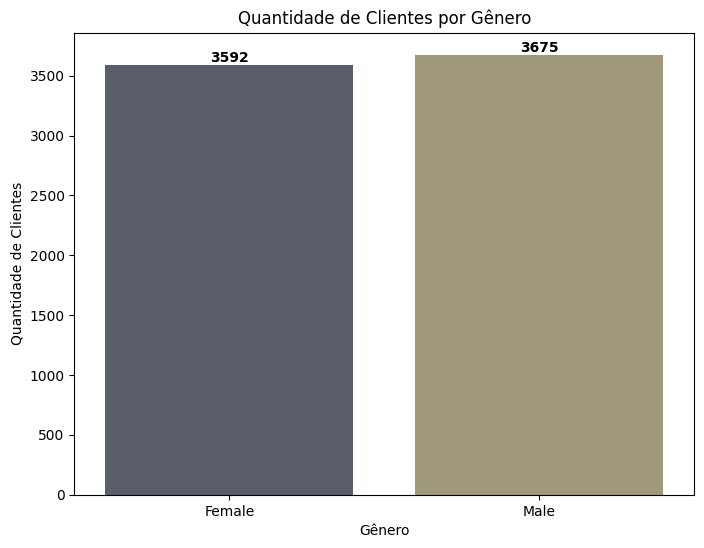

In [17]:
plt.figure(figsize=(8, 6))
# Gr√°fico de barras
ax = sns.countplot(x='customer_gender', data=dados_normalizados, palette='cividis', hue='customer_gender', legend='auto')
# Contagem por g√™nero
counts = dados_normalizados['customer_gender'].value_counts()
# Adicionar r√≥tulos no topo das barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',
                fontsize=10, fontweight='bold', color='black')

plt.title('Quantidade de Clientes por G√™nero')
plt.xlabel('G√™nero')
plt.ylabel('Quantidade de Clientes')
plt.show()

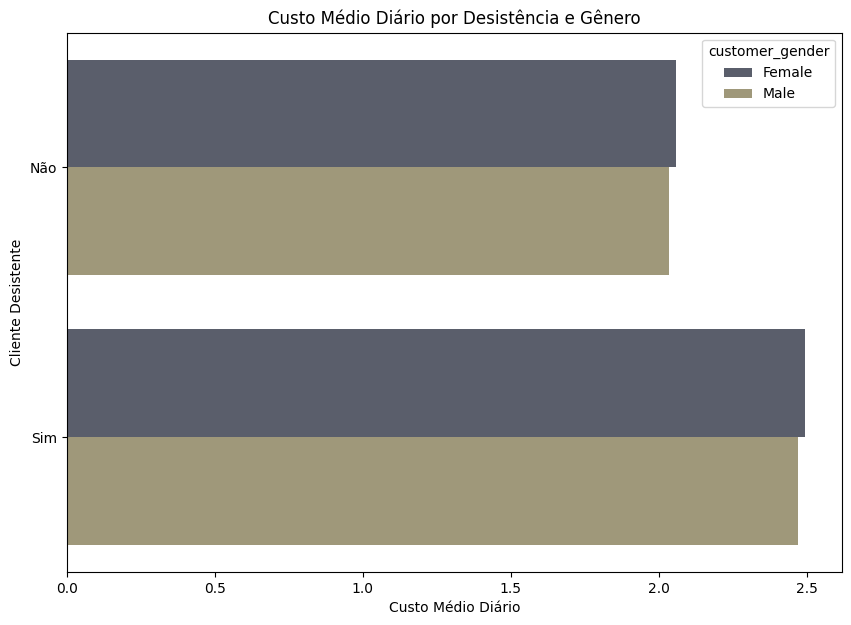

In [18]:
# prompt: Gr√°fico de barra horizontal usando a seaborn, mostrando a rela√ß√£o entre as colunas, churn, genero e custo diario

# Agrupar por 'Churn' e 'customer_gender' e calcular a m√©dia do 'Contas_Diarias'
churn_gender_daily_charge = dados_normalizados.groupby(['Churn', 'customer_gender'])['Contas_Diarias'].mean().reset_index()

churn_gender_daily_charge['Churn'] = churn_gender_daily_charge['Churn'].map({True: 'Sim', False: 'N√£o'})

# Criar o gr√°fico de barra horizontal
plt.figure(figsize=(10, 7))
sns.barplot(x='Contas_Diarias', y='Churn', hue='customer_gender', data=churn_gender_daily_charge, palette='cividis', orient='h')

plt.title('Custo M√©dio Di√°rio por Desist√™ncia e G√™nero')
plt.xlabel('Custo M√©dio Di√°rio')
plt.ylabel('Cliente Desistente')
plt.show()

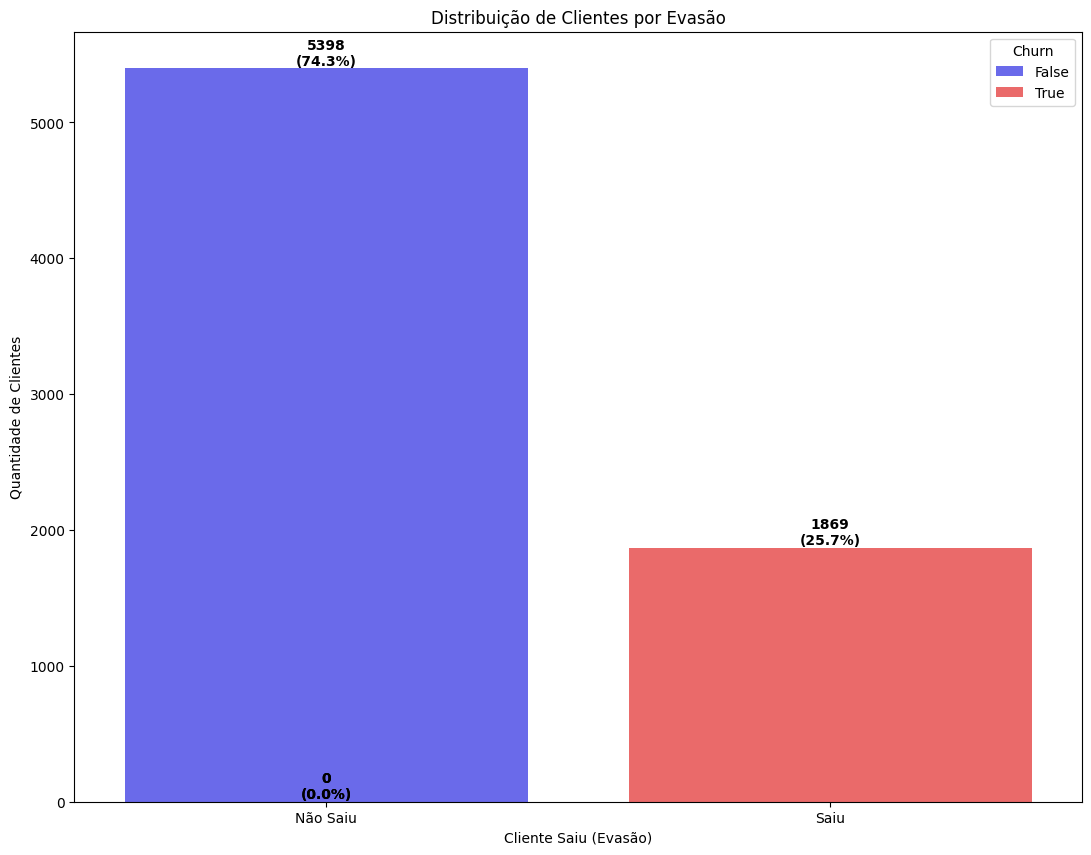

In [19]:
# Distribui√ß√£o da vari√°vel 'Churn'
plt.figure(figsize=(13, 10))
ax = sns.countplot(x='Churn', data=dados_normalizados, palette='seismic', hue='Churn', legend='auto')

# Adicionar r√≥tulos com a contagem e a porcentagem
total = len(dados_normalizados)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}\n({height/total:.1%})',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',
                fontsize=10, fontweight='bold', color='black')

plt.title('Distribui√ß√£o de Clientes por Evas√£o')
plt.xlabel('Cliente Saiu (Evas√£o)')
plt.ylabel('Quantidade de Clientes')
plt.xticks([False, True], ['N√£o Saiu', 'Saiu'])
plt.show()


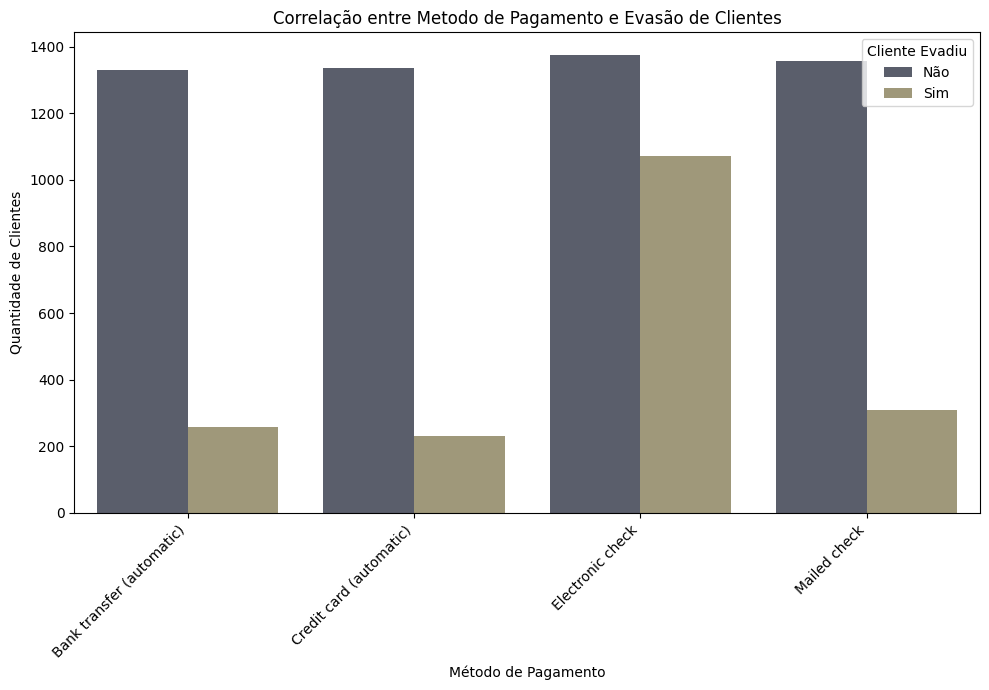

In [20]:
plt.figure(figsize=(10, 7))
# Calcular a contagem de clientes por m√©todo de pagamento e status de churn
churn_payment_counts = dados_normalizados.groupby(['account_PaymentMethod', 'Churn']).size().reset_index(name='count')
# Mapear os valores booleanos de 'Churn' para strings leg√≠veis
churn_payment_counts['Churn'] = churn_payment_counts['Churn'].map({True: 'Sim', False: 'N√£o'})
# Criar o gr√°fico de barras agrupado usando seaborn
sns.barplot(x='account_PaymentMethod', y='count', hue='Churn', data=churn_payment_counts, palette='cividis')
plt.title('Correla√ß√£o entre Metodo de Pagamento e Evas√£o de Clientes')
plt.xlabel('M√©todo de Pagamento')
plt.ylabel('Quantidade de Clientes')
plt.xticks(rotation=45, ha='right') # Rotaciona os r√≥tulos do eixo x para melhor visualiza√ß√£o
plt.legend(title='Cliente Evadiu') # Nomeia a legenda
plt.tight_layout() # Ajusta o layout para evitar sobreposi√ß√£o
plt.show()

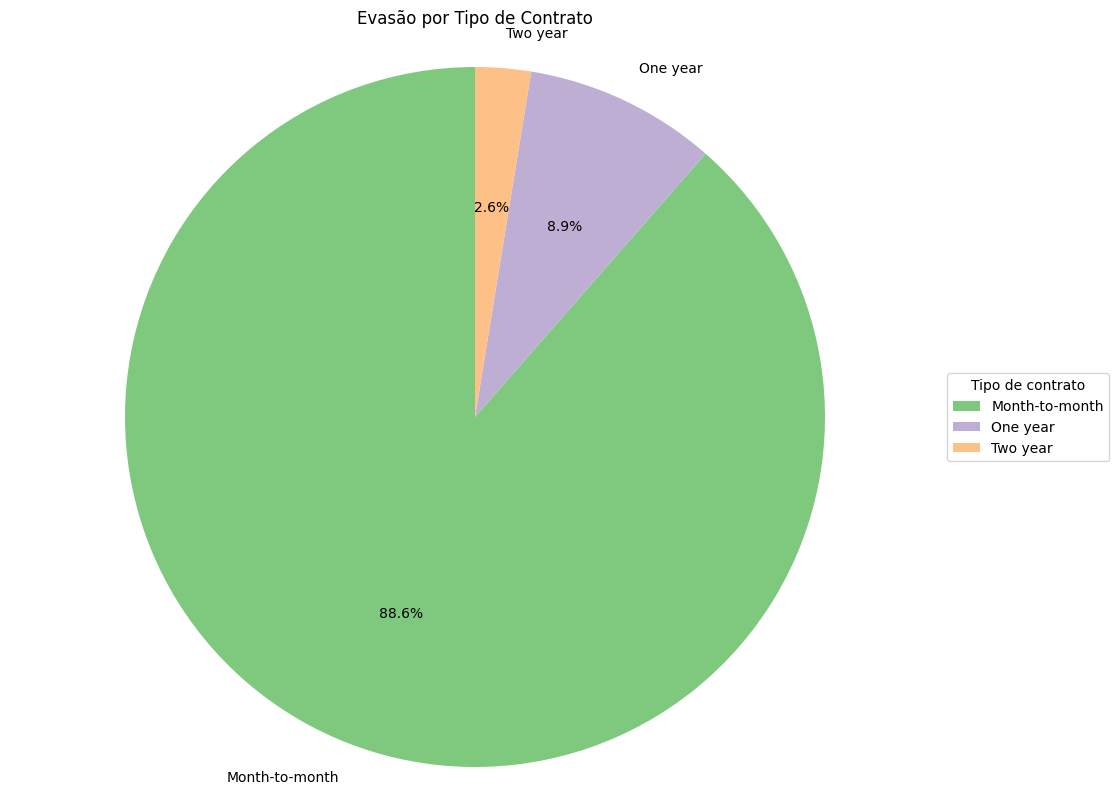

In [25]:
# prompt: usando a matplotlib criar um gr√°fico de pizza que demonstre a evas√£o por tipo de contrato, as fatias da pizza devem se chamar "Tipo de contrato"

# Contar a quantidade de clientes que evadiram por tipo de contrato
churn_by_contract = dados_normalizados[dados_normalizados['Churn'] == True]['account_Contract'].value_counts()

# Criar o gr√°fico de pizza
plt.figure(figsize=(12, 10))
plt.pie(churn_by_contract, labels=churn_by_contract.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Accent')[0:len(churn_by_contract)])
plt.title('Evas√£o por Tipo de Contrato')
plt.axis('equal')  # Mant√©m o gr√°fico de pizza circular.

# Adicionar a legenda com os nomes das fatias como "Tipo de contrato"
plt.legend(title="Tipo de contrato", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

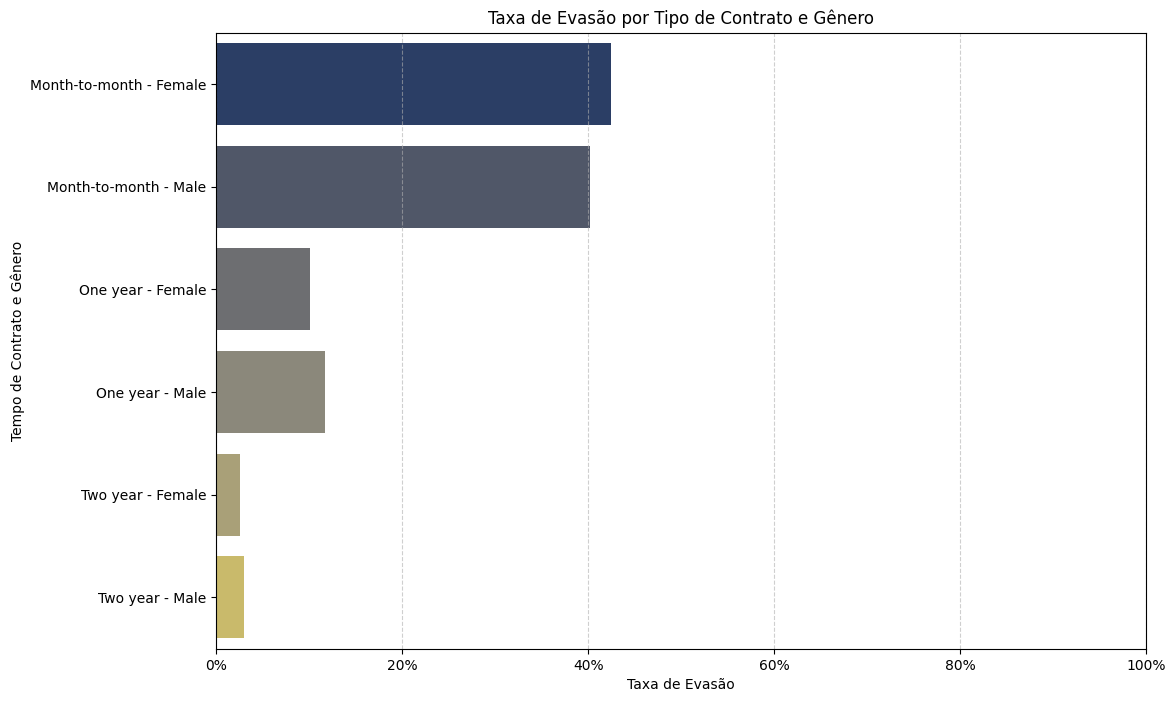

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter

# Calcular a taxa de evas√£o para cada combina√ß√£o de tempo de contrato e g√™nero
churn_rate_contract_gender = dados_normalizados.groupby(['account_Contract', 'customer_gender'])['Churn'].mean().reset_index()

# Combinar as colunas de contrato e g√™nero para o eixo y
churn_rate_contract_gender['Contract_Gender'] = churn_rate_contract_gender['account_Contract'] + ' - ' + churn_rate_contract_gender['customer_gender']

# Criar o gr√°fico de barras horizontais (√°rea)
plt.figure(figsize=(12, 8))

sns.barplot(x='Churn', y='Contract_Gender', data=churn_rate_contract_gender, palette='cividis', hue='Contract_Gender', orient='h')

plt.title('Taxa de Evas√£o por Tipo de Contrato e G√™nero')
plt.xlabel('Taxa de Evas√£o')
plt.ylabel('Tempo de Contrato e G√™nero')
plt.xlim(0, 1)  # Limites de 0% a 100%

# Formatar o eixo X como porcentagem
plt.gca().xaxis.set_major_formatter(PercentFormatter(1.0))

plt.grid(axis='x', linestyle='--', alpha=0.6)  # Grid horizontal

plt.show()

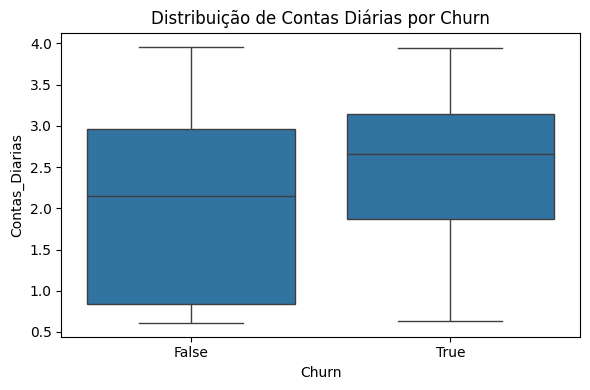

In [29]:
# Rela√ß√£o direta entre Contas Di√°rias e Churn
plt.figure(figsize=(6, 4))
sns.boxplot(data=dados_normalizados, x='Churn', y='Contas_Diarias')
plt.title("Distribui√ß√£o de Contas Di√°rias por Churn")
plt.tight_layout()
plt.show()

/tmp/ipython-input-32-2090947275.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dados_normalizados, x='Churn', y='qtd_servicos', palette='Set2')


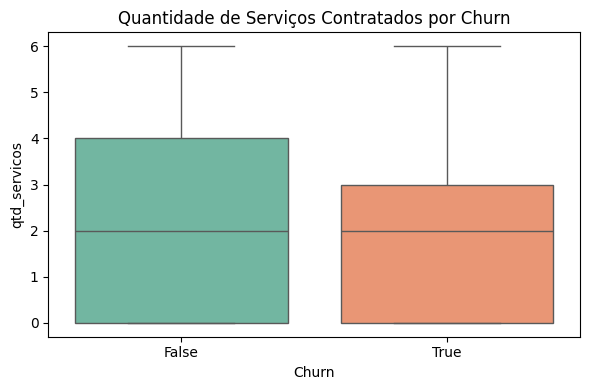

In [32]:
# Adicionar vari√°vel: quantidade de servi√ßos contratados
servicos_bool = dados_normalizados.filter(like='internet_')                  .drop(columns=['internet_InternetService'])                  .astype(int)
dados_normalizados['qtd_servicos'] = servicos_bool.sum(axis=1)


# Rela√ß√£o direta entre quantidade de servi√ßos e Churn
plt.figure(figsize=(6, 4))
sns.boxplot(data=dados_normalizados, x='Churn', y='qtd_servicos', palette='Set2')
plt.title("Quantidade de Servi√ßos Contratados por Churn")
plt.tight_layout()
plt.show()

#üìÑRelatorio Final



## üìä Relat√≥rio Anal√≠tico sobre Evas√£o de Clientes (Churn) - TelecomX

### 1. Introdu√ß√£o

A evas√£o de clientes, ou **Churn**, representa um dos maiores desafios para empresas de telecomunica√ß√µes. Reduzir a taxa de churn √© essencial para manter a base de clientes ativa, reduzir custos com aquisi√ß√£o de novos consumidores e aumentar a lucratividade. Este relat√≥rio visa entender os principais fatores que levam √† evas√£o de clientes com base em dados hist√≥ricos de clientes da empresa fict√≠cia TelecomX.

---

### 2. Limpeza e Tratamento de Dados

* O dataset cont√©m **7.267 registros** e **22 vari√°veis**.
* Realizamos a **convers√£o de tipos de dados** para an√°lise correta: booleanos, categorias e num√©ricos.

---

### 3. An√°lise Explorat√≥ria de Dados (EDA)

#### üìå Propor√ß√£o de Churn

* **25,7%** dos clientes realizaram churn.
  

#### üìå Correla√ß√µes com o Churn

*  Clientes mais antigos tendem a permanecer.
*  Clientes com faturas mensais mais altas t√™m maior chance de churn.
*  Clientes que j√° investiram mais tendem a permanecer.

  

#### üìå An√°lise Categ√≥rica

Gr√°ficos dispon√≠veis:

* Quantidade de Clientes por G√™nero
* Custo M√©dio Di√°rio por Desist√™ncia e G√™nero
* Distribui√ß√£o de Clientes por Evas√£o
* Correla√ß√£o entre Metodo de Pagamento e Evas√£o de Clientes
* Evas√£o por Tipo de Contrato
* Taxa de Evas√£o por Tipo de Contrato e G√™nero
* Distribui√ß√£o de Contas Di√°rias por Churn
* Quantidade de Servi√ßos Contratados por Churn

**Destaques**:

* **Contrato mensal** apresenta churn significativamente maior.
* Clientes com **servi√ßos de fibra √≥tica** t√™m maior evas√£o.
* Pagamento via **"Electronic check"** est√° associado a maior churn.
* Clientes sem **dependentes ou parceiros** t√™m maior propens√£o ao churn.

---

### 4. Conclus√µes e Insights

* **Tempo de perman√™ncia (tenure)** √© o maior preditor negativo: fidelizar rapidamente reduz churn.
* Contratos **mensais** favorecem evas√£o ‚Äî planos anuais ou bianuais reduzem a probabilidade.
* **Faturas altas e servi√ßos intensivos** aumentam insatisfa√ß√£o e evas√£o, especialmente com Internet.
* A **forma de pagamento** tem influ√™ncia comportamental significativa.
* O churn est√° mais relacionado com o **perfil do servi√ßo contratado** do que com g√™nero ou idade.

---

### 5. Recomenda√ß√µes

‚úÖ **Criar programas de fidelidade** ou b√¥nus progressivos com o tempo de perman√™ncia.

‚úÖ **Incentivar migra√ß√£o para contratos anuais** com benef√≠cios (ex: desconto, b√¥nus de dados).

‚úÖ **Monitorar clientes com contas altas** e oferecer revis√£o de pacotes ou atendimento dedicado.

‚úÖ **Melhorar suporte t√©cnico**, especialmente para clientes de fibra √≥tica.

‚úÖ **Analisar e intervir preventivamente** em clientes que pagam por *"Electronic check"* e est√£o sem parceiros/dependentes.

‚úÖ Investir em **modelos preditivos de churn** para a√ß√µes proativas de reten√ß√£o.

---


Resumo estat√≠stico:
       customer_tenure  account_Charges_Monthly  account_Charges_Total  \
count      7256.000000              7256.000000            7256.000000   
mean         32.395535                64.755423            2280.634213   
std          24.558067                30.125739            2268.632997   
min           1.000000                18.250000              18.800000   
25%           9.000000                35.450000             400.225000   
50%          29.000000                70.300000            1391.000000   
75%          55.000000                89.900000            3785.300000   
max          72.000000               118.750000            8684.800000   

       Contas_Diarias  qtd_servicos  
count     7256.000000   7256.000000  
mean         2.158467      2.034454  
std          1.004282      1.848105  
min          0.610000      0.000000  
25%          1.180000      0.000000  
50%          2.340000      2.000000  
75%          3.000000      3.000000  
max     

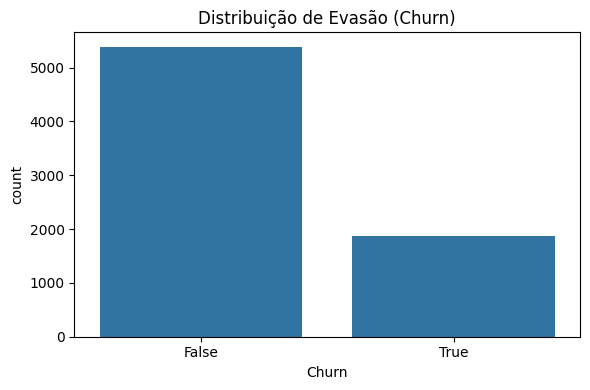

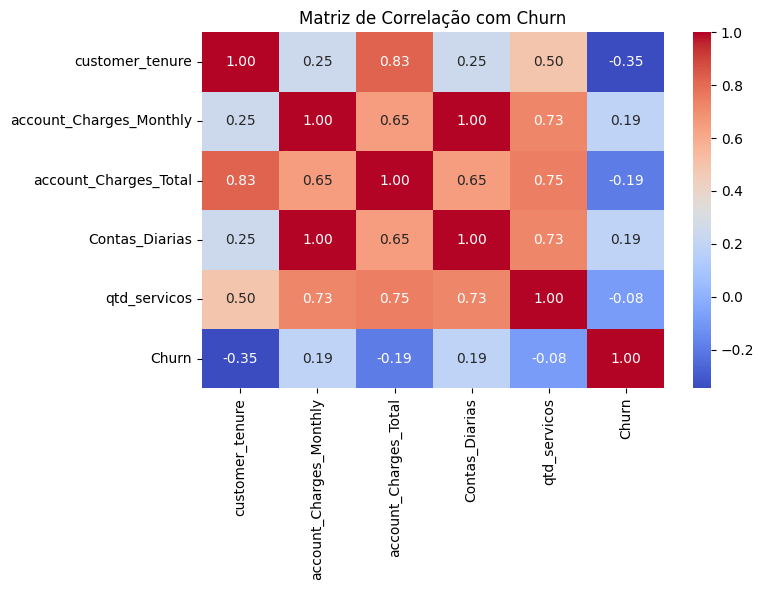

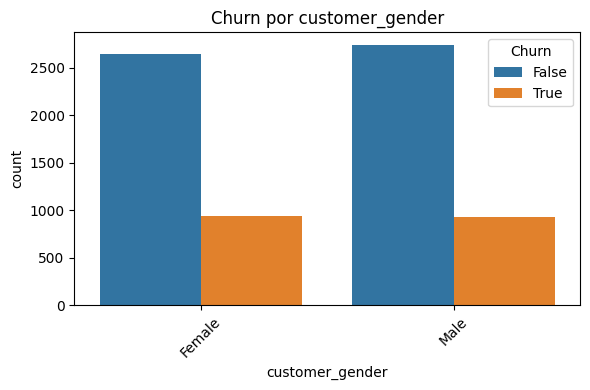

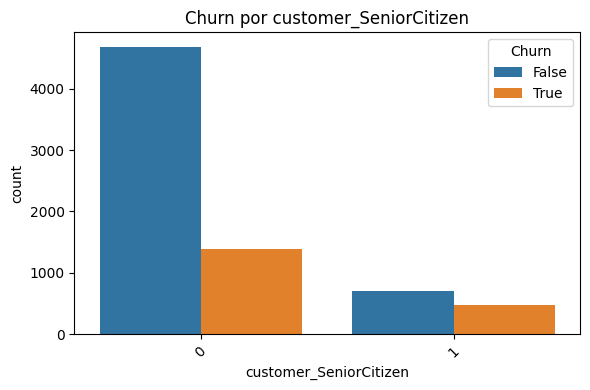

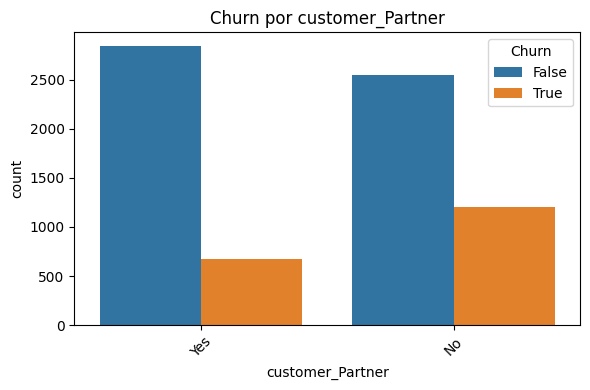

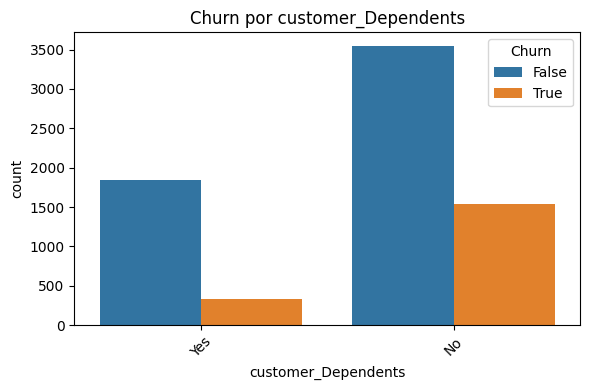

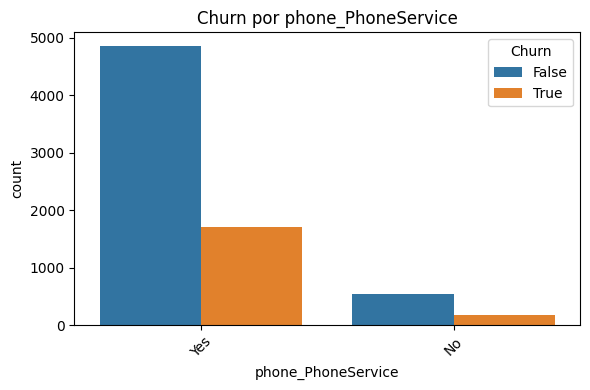

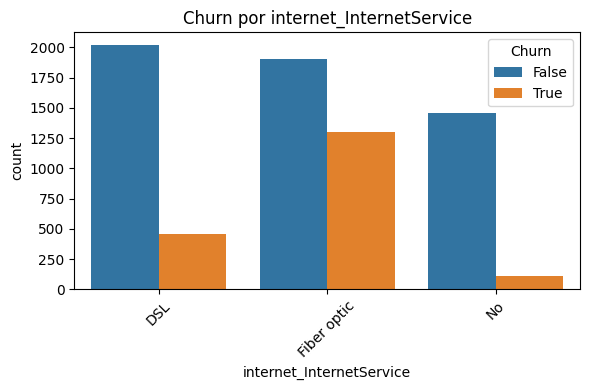

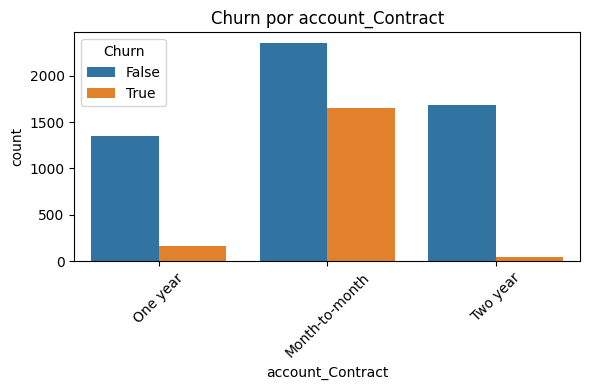

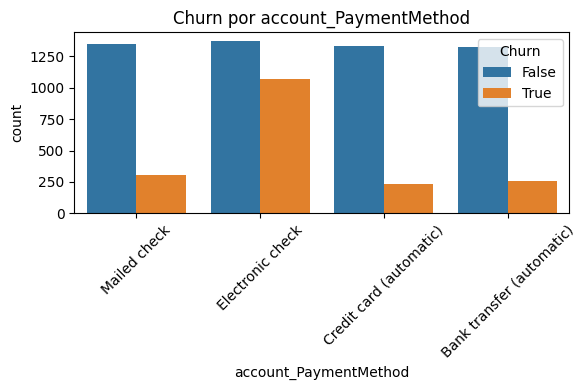

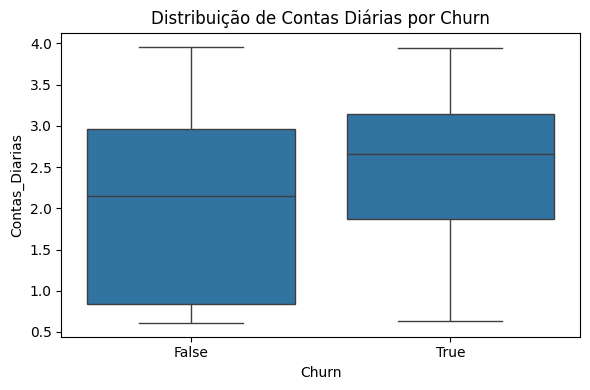

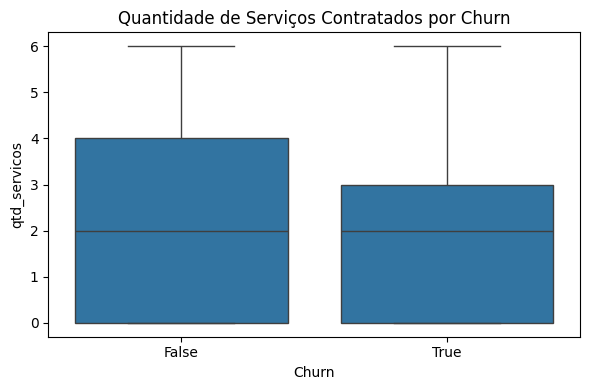

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o dataset
df = pd.read_csv('TelecomX_Data_normalizado.csv')

# Convers√£o de tipos
df['Churn'] = df['Churn'].astype(bool)
df['customer_SeniorCitizen'] = df['customer_SeniorCitizen'].astype('category')
df['customer_tenure'] = df['customer_tenure'].astype(int)
df['account_Charges_Monthly'] = df['account_Charges_Monthly'].astype(float)
df['account_Charges_Total'] = pd.to_numeric(df['account_Charges_Total'], errors='coerce')

# Tratamento de valores ausentes
df.dropna(subset=['account_Charges_Total'], inplace=True)

# Adicionar vari√°vel: quantidade de servi√ßos contratados
servicos_bool = df.filter(like='internet_')                  .drop(columns=['internet_InternetService'])                  .astype(int)
df['qtd_servicos'] = servicos_bool.sum(axis=1)

# Estat√≠sticas descritivas
print("Resumo estat√≠stico:")
print(df.describe())

# Distribui√ß√£o de churn
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Distribui√ß√£o de Evas√£o (Churn)')
plt.tight_layout()
plt.show()

# Correla√ß√£o entre vari√°veis num√©ricas e churn
df_corr = df[['customer_tenure', 'account_Charges_Monthly', 'account_Charges_Total',
              'Contas_Diarias', 'qtd_servicos', 'Churn']].copy()
df_corr['Churn'] = df_corr['Churn'].astype(int)
correlation_matrix = df_corr.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correla√ß√£o com Churn')
plt.tight_layout()
plt.show()

# Gr√°ficos categ√≥ricos comparando com Churn
categorias = [
    "customer_gender", "customer_SeniorCitizen", "customer_Partner",
    "customer_Dependents", "phone_PhoneService", "internet_InternetService",
    "account_Contract", "account_PaymentMethod"
]

for col in categorias:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, hue="Churn")
    plt.title(f'Churn por {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Rela√ß√£o direta entre Contas Di√°rias e Churn
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Churn', y='Contas_Diarias')
plt.title("Distribui√ß√£o de Contas Di√°rias por Churn")
plt.tight_layout()
plt.show()

# Rela√ß√£o direta entre quantidade de servi√ßos e Churn
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Churn', y='qtd_servicos')
plt.title("Quantidade de Servi√ßos Contratados por Churn")
plt.tight_layout()
plt.show()